<a href="https://colab.research.google.com/github/VanshikaNehra23/NLP_Classification/blob/main/NLP_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/root2aiData.csv')

In [4]:
df.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [5]:
x=df.isna().sum()
x

Text      3
Target    0
dtype: int64

In [6]:
df['Text'].bfill(inplace=True) #removing of null values

In [7]:
import re
def remove(myString):
  myString = re.sub(r"[\n\t]*", "", myString) #removing next line and tabs
  myString = re.sub(r'[.,"\'-?:!;]', '', myString) #removing punctuation marks
  return myString
df['Text2']= df['Text'].apply(lambda x: remove(x))

In [8]:
#removal of all stop words such as I, am, is, are, etc.
import string
import nltk
nltk.download('stopwords') 
stopwords=nltk.corpus.stopwords.words('english')
def clean_text(txt):
    txt="".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',txt)
    txt=[word for word in tokens if word not in stopwords]
    return txt

df['Text2']=df['Text2'].apply(lambda x:clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df['Text'][0]

'reserve bank forming expert committee based institute development research banking technology study approach distributed ledger technology help support shift'

In [10]:
df['Text2'][0]

['reserve',
 'bank',
 'forming',
 'expert',
 'committee',
 'based',
 'institute',
 'development',
 'research',
 'banking',
 'technology',
 'study',
 'approach',
 'distributed',
 'ledger',
 'technology',
 'help',
 'support',
 'shift']

In [11]:
#Lemmatization - converting into root meaningful word
nltk.download('wordnet')
wn=nltk.WordNetLemmatizer()
def lemm(token_txt):
    text=[wn.lemmatize(word) for word in token_txt]
    return text
df['Text2']=df['Text2'].apply(lambda x: lemm(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
#converting words into numbers for classification
df['labels']=df['Target'].map({"FinTech":0,"Cyber Security":1,"Bigdata":2,"Reg Tech":3,
                "credit reporting":4,"Blockchain":5,"Neobanks":6,"Microservices":7,"Stock Trading":8,
                "Robo Advising":9,"Data Security":10})
Y=df['labels'].values

In [13]:
df.tail()

,Text,Target,Text2,labels
22699,fourth study discusses blockchain technology e...,Reg Tech,"[fourth, study, discus, blockchain, technology...",3
22700,book finishes stating biggest issue emerging F...,Reg Tech,"[book, finish, stating, biggest, issue, emergi...",3
22701,people culture cess,Reg Tech,"[people, culture, ce]",3
22702,author challenges execu tive lead change stop ...,Reg Tech,"[author, challenge, execu, tive, lead, change,...",3
22703,change data driven culture come bottom must start,Reg Tech,"[change, data, driven, culture, come, bottom, ...",3


In [14]:
from sklearn.model_selection import train_test_split
df_train,df_test,Y_train,Y_test= train_test_split(df['Text2'],Y,test_size=0.33)

In [15]:
df['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Dropout, Conv1D, GlobalMaxPooling1D, Embedding, Flatten,LSTM,MaxPooling1D
from tensorflow.keras.models import Model,Sequential
import time
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics

In [18]:
#Tokenisation of all words
Max=20000
tokenizer=Tokenizer(num_words=Max)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_test=tokenizer.texts_to_sequences(df_test)

In [19]:
word2idx=tokenizer.word_index
V=len(word2idx)
print('Found %s unique tokens'%V)

Found 9243 unique tokens


In [20]:
#Padding the sequences 
data_train = pad_sequences(sequences_train)
T=data_train.shape[1]
data_test = pad_sequences(sequences_test,maxlen=T)

In [21]:
#Using CNN
D=100
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=(Dropout(0.25))(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=(Dropout(0.25))(x)
x=Conv1D(128,3,activation='relu')(x)
x=MaxPooling1D()(x)
x=(Dropout(0.5))(x)
x=Flatten()(x)
x=Dense(11,activation='softmax')(x)

In [22]:
model=Model(i,x)
model.compile(
        loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

print("Training model....")
r=model.fit(
data_train,
Y_train,
epochs=20,
validation_data=(data_test,Y_test))

Training model....
Epoch 1/20
476/476 [==============================] - 16s 32ms/step - loss: 2.0197 - accuracy: 0.3800 - val_loss: 1.9962 - val_accuracy: 0.4053
Epoch 2/20
476/476 [==============================] - 15s 32ms/step - loss: 1.9521 - accuracy: 0.4052 - val_loss: 1.9743 - val_accuracy: 0.4100
Epoch 3/20
476/476 [==============================] - 15s 31ms/step - loss: 1.9117 - accuracy: 0.4161 - val_loss: 1.9419 - val_accuracy: 0.4135
Epoch 4/20
476/476 [==============================] - 15s 31ms/step - loss: 1.8624 - accuracy: 0.4271 - val_loss: 1.9187 - val_accuracy: 0.4195
Epoch 5/20
476/476 [==============================] - 15s 31ms/step - loss: 1.8123 - accuracy: 0.4387 - val_loss: 1.9299 - val_accuracy: 0.4208
Epoch 6/20
476/476 [==============================] - 15s 31ms/step - loss: 1.7629 - accuracy: 0.4501 - val_loss: 1.9568 - val_accuracy: 0.4215
Epoch 7/20
476/476 [==============================] - 15s 31ms/step - loss: 1.7213 - accuracy: 0.4661 - val_loss: 1.9

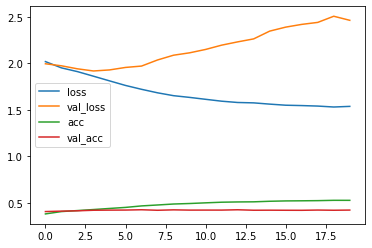

In [23]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [25]:
#Using CNN (2)
D=100
model=Sequential()
model.add(Input(shape=(T,)))
model.add(Embedding(V+1,D))
model.add(Conv1D(16,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.25))

model.add(Conv1D(32,3,activation='relu'))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.25))

model.add(Conv1D(64,3,activation='relu'))
model.add(Conv1D(64,3,activation='relu'))
model.add(MaxPooling1D(3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(11,activation="softmax"))

In [26]:
model.compile(
        loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

print("Training model....")
r=model.fit(
data_train,
Y_train,
epochs=15,
validation_data=(data_test,Y_test))

Training model....
Epoch 1/15
476/476 [==============================] - 17s 34ms/step - loss: 2.0303 - accuracy: 0.3737 - val_loss: 1.9981 - val_accuracy: 0.3880
Epoch 2/15
476/476 [==============================] - 15s 32ms/step - loss: 1.9214 - accuracy: 0.3993 - val_loss: 1.8850 - val_accuracy: 0.4209
Epoch 3/15
476/476 [==============================] - 16s 33ms/step - loss: 1.7819 - accuracy: 0.4326 - val_loss: 1.8255 - val_accuracy: 0.4385
Epoch 4/15
476/476 [==============================] - 15s 33ms/step - loss: 1.6527 - accuracy: 0.4643 - val_loss: 1.8026 - val_accuracy: 0.4562
Epoch 5/15
476/476 [==============================] - 16s 34ms/step - loss: 1.5525 - accuracy: 0.4931 - val_loss: 1.8487 - val_accuracy: 0.4456
Epoch 6/15
476/476 [==============================] - 16s 34ms/step - loss: 1.4562 - accuracy: 0.5204 - val_loss: 1.9011 - val_accuracy: 0.4494
Epoch 7/15
476/476 [==============================] - 16s 33ms/step - loss: 1.3886 - accuracy: 0.5421 - val_loss: 1.9

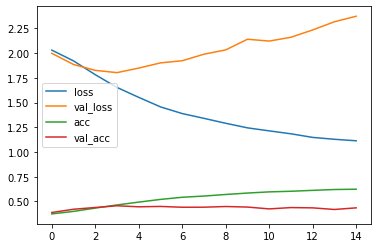

In [27]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [28]:
#Using LSTM
D=100
M=64
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True,dropout=0.1)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(11,activation='softmax')(x)
model=Model(i,x)

In [29]:
model=Model(i,x)
model.compile(
        loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

print("Training model....")
r=model.fit(
data_train,
Y_train,
epochs=15,
validation_data=(data_test,Y_test))

Training model....
Epoch 1/15
476/476 [==============================] - 47s 95ms/step - loss: 1.8641 - accuracy: 0.4237 - val_loss: 1.5534 - val_accuracy: 0.5409
Epoch 2/15
476/476 [==============================] - 47s 99ms/step - loss: 1.2841 - accuracy: 0.6176 - val_loss: 1.2721 - val_accuracy: 0.6223
Epoch 3/15
476/476 [==============================] - 47s 99ms/step - loss: 0.9105 - accuracy: 0.7246 - val_loss: 1.1747 - val_accuracy: 0.6394
Epoch 4/15
476/476 [==============================] - 48s 101ms/step - loss: 0.6881 - accuracy: 0.7911 - val_loss: 1.1959 - val_accuracy: 0.6391
Epoch 5/15
476/476 [==============================] - 50s 104ms/step - loss: 0.5513 - accuracy: 0.8326 - val_loss: 1.2381 - val_accuracy: 0.6329
Epoch 6/15
476/476 [==============================] - 51s 107ms/step - loss: 0.4563 - accuracy: 0.8583 - val_loss: 1.3183 - val_accuracy: 0.6283
Epoch 7/15
476/476 [==============================] - 51s 108ms/step - loss: 0.3853 - accuracy: 0.8803 - val_loss:

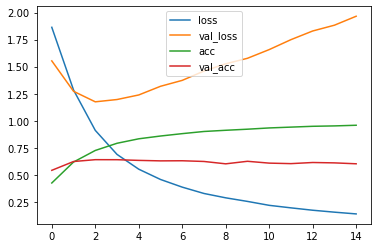

In [30]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [31]:
#Using SVM
model = svm.SVC(C = 11)
t0 = time.time()
model.fit(data_train, Y_train)
t1 = time.time()
svc_Ypred = model.predict(data_test)
t2 = time.time()
svc_time_linear_train = t1-t0
svc_time_linear_predict = t2-t1
svc_f1Score = f1_score(Y_test, svc_Ypred, average = "weighted")

In [32]:
print("Training time: %fs; Prediction time: %fs" % (svc_time_linear_train, svc_time_linear_predict))

Training time: 109.811443s; Prediction time: 23.163067s


In [33]:
svc_f1Score

0.2634746403005783